In [64]:
# Import required libraries and dependencies
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [65]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "C:/Users/nafis/Documents/UofT_Bootcamp_Work/CryptoClustering/Starter_Code/Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [66]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [67]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [68]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Select only numerical columns from the DataFrame
numerical_data = df_market_data.select_dtypes(include=['float64', 'int64'])

# Normalize the data using fit_transform
scaled_data = scaler.fit_transform(numerical_data)

In [69]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)

# Copy the crypto names from the original DataFrame
scaled_df["coin_id"] = df_market_data.index

# Set the coin_id column as index
scaled_df.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [70]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [71]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans_model.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)

c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [72]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  # k-values from 1 to 11
    "inertia": inertia        # Corresponding inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


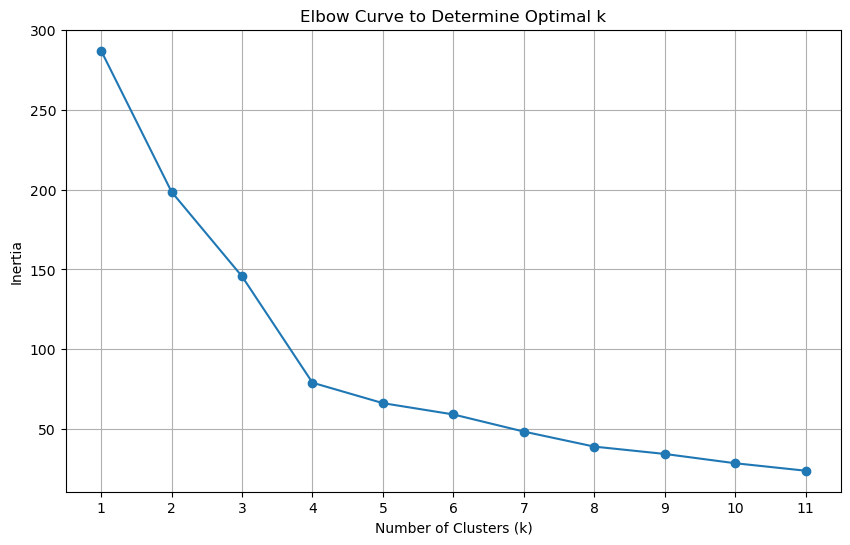

In [73]:
# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-')
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

k = 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [74]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

In [75]:
# Fit the model to the scaled data
kmeans_model.fit(scaled_df)


c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [76]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values
print("Cluster Labels:\n", clusters)


Cluster Labels:
 [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [77]:
# Create a copy of the scaled DataFrame
scaled_df_copy = scaled_df.copy()

In [78]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_df_copy["Cluster"] = clusters

# Display the copy of the scaled DataFrame with the new column
scaled_df_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [79]:
# Create a scatter plot using hvPlot
scatter_plot = scaled_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",  # Color points by cluster labels
    colormap="Category10",  # Use a colormap for better visualization
    hover_cols=["coin_id"]  # Add the crypto names to the hover info
)

# Display the scatter plot
scatter_plot



:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [80]:
# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

In [81]:
# Use the PCA model with fit_transform to reduce the original scaled DataFrame
pca_data = pca.fit_transform(scaled_df)

# Create a new DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"],  # Name the principal components
    index=scaled_df.index           # Retain the original index
)

# Display the first few rows of the scaled PCA data
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [82]:
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
print("Explained Variance Ratio for Each Principal Component:")
print(f"PC1: {explained_variance[0]:.2f}")
print(f"PC2: {explained_variance[1]:.2f}")
print(f"PC3: {explained_variance[2]:.2f}")

# Display the total explained variance
print(f"Total Explained Variance: {sum(explained_variance):.2f}")


Explained Variance Ratio for Each Principal Component:
PC1: 0.37
PC2: 0.35
PC3: 0.18
Total Explained Variance: 0.90


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components, as shown in the output, is 0.90. This means the three principal components collectively account for 90% of the variance in the data.

In [83]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"],  # Name the principal components
    index=scaled_df.index           # Retain the original index
)

# Copy the crypto names from the original scaled DataFrame
pca_df["coin_id"] = scaled_df.index

# Set the coin_id column as the index
pca_df.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [84]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [85]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)

# Display the inertia values
print(inertia)


[256.87408556789234, 168.81189630685213, 115.91807663320057, 49.66549665179736, 41.35731380312854, 30.796641787041583, 25.915456910456122, 21.890936274633216, 17.72069885447366, 13.838698708864566, 7.984354811896225]


c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [86]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  # k-values from 1 to 11
    "inertia": inertia        # Corresponding inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


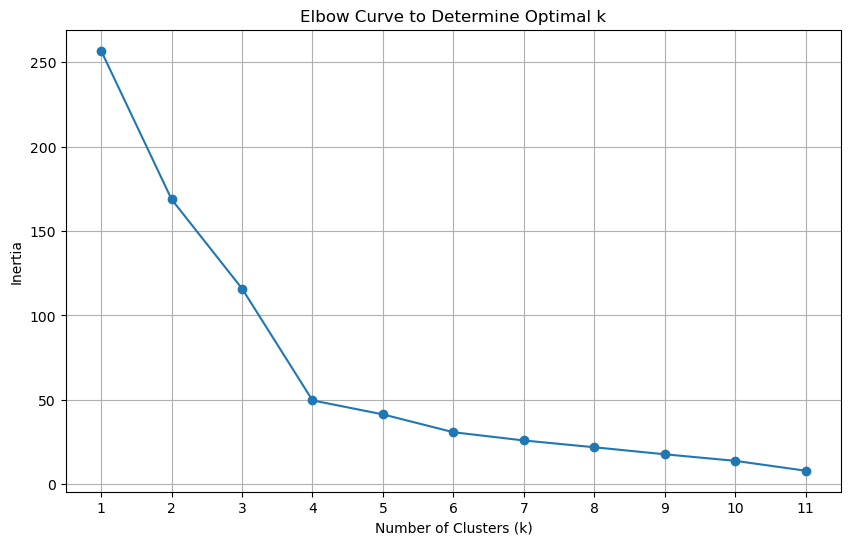

In [87]:
# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-')
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))
plt.grid()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no it doesn't differ from the original.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [88]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace with the optimal k value from the Elbow Curve analysis
kmeans_model = KMeans(n_clusters=best_k, random_state=0)


In [89]:
# Fit the model to the PCA-transformed data
kmeans_model.fit(pca_df)


c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [90]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values
print("Cluster Labels:\n", pca_clusters)

Cluster Labels:
 [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [91]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_copy["Cluster"] = pca_clusters

# Display the copy of the scaled PCA DataFrame with the new column
pca_df_copy.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [92]:
# Create a scatter plot using hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",  # Color the points by the cluster labels
    colormap="Category10",  # Use a colormap for better visualization
    hover_cols=["coin_id"],  # Add the cryptocurrency names in the hover info
    title="Cryptocurrency Clustering Based on PCA"
)

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

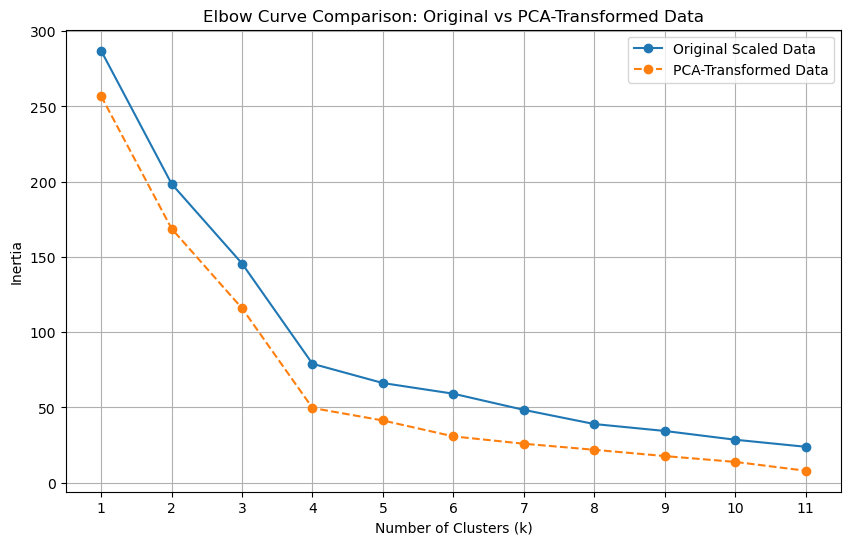

In [93]:
# Composite plot to contrast the Elbow curves
# Create the Elbow curve for the original scaled data
inertia_original = []  # Replace with your actual inertia values for the original scaled data
for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(scaled_df)
    inertia_original.append(kmeans_model.inertia_)

# Create the Elbow curve for the PCA-transformed data
inertia_pca = []  # Replace with your actual inertia values for the PCA data
for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(pca_df)
    inertia_pca.append(kmeans_model.inertia_)

# Plot both Elbow curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), inertia_original, marker='o', linestyle='-', label="Original Scaled Data")
plt.plot(range(1, 12), inertia_pca, marker='o', linestyle='--', label="PCA-Transformed Data")
plt.title("Elbow Curve Comparison: Original vs PCA-Transformed Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))
plt.legend()
plt.grid()
plt.show()

In [94]:
# Composite plot to contrast the clusters
# Add cluster labels to both DataFrames
scaled_df_copy["Cluster"] = kmeans_model.fit_predict(scaled_df)
pca_df_copy["Cluster"] = kmeans_model.fit_predict(pca_df)

# Scatter plot for the original scaled data
scatter_scaled = scaled_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="Category10",
    title="Clusters from Original Scaled Data",
    hover_cols=["coin_id"]
)

# Scatter plot for the PCA-transformed data
scatter_pca = pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap="Category10",
    title="Clusters from PCA-Transformed Data",
    hover_cols=["coin_id"]
)

# Composite plot combining both scatter plots
composite_plot = scatter_scaled + scatter_pca

# Display the composite plot
composite_plot

c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nafis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

1. Simplification of the Data
PCA reduces the dimensionality of the dataset, focusing on the most significant components of variance. This simplification can help in identifying the primary structure of the data, making clustering more efficient and less prone to overfitting.
2. Impact on Inertia
From the Elbow Curve:
The inertia for the PCA-transformed data (orange line) is consistently lower compared to the original scaled data (blue line).
This indicates that PCA has removed some variability or noise in the data, making the clusters more compact and distinct.
3. Cluster Shape and Separation
In the scatter plot for the original scaled data:
Clusters may appear more spread out due to the influence of all features, some of which might not contribute meaningfully to clustering.
Using all features can sometimes lead to noisier clusters with overlapping boundaries.
In PCA-transformed data:
The clusters are based on the principal components, which focus on the most meaningful variance. This can lead to clearer separation and better-defined cluster structures.
4. Computational Efficiency
Reducing the data to fewer dimensions (3 in this case) significantly reduces computational complexity for K-Means, which scales poorly with higher-dimensional data.
5. Trade-offs
While PCA retains 90% of the variance (as shown earlier), it still loses 10% of the data's original information.
Clusters based on PCA may miss subtleties that could be captured by using the original features, especially if the discarded variance includes critical details.
Conclusion:
Using fewer features via PCA for clustering results in more efficient computation, clearer cluster separation, and reduced noise. However, it may lose minor details that could be meaningful in specific cases. The decision to use PCA depends on whether the reduction in dimensionality retains enough relevant information for the specific clustering task.